## 1. Central Limit Theorem

The Central Limit Theorem (CLT) is a key concept in probability theory. It says the statistic and probabilistic methods that work for **normal distribution** can also be applied to many other problems which deal with different types of distributions. 

CLT states that the sampling distribution of the **sample mean (or sum)** of a sufficiently large number of **independent, identically distributed** (i.i.d.) random variables, will be approximately normally distributed, regardless of the original distribution of the population.

*In simpler terms, if you take enough random samples from a population, the means of these samples will form a normal distribution (a bell curve), even if the original population distribution is not normal.*

### What does that mean?
* If you take many random samples (same size) from a population, each has its own **mean** (average).
* Plotting those means gives a bell-shaped curve, even if the population is skewed.
* This distribution has a **mean $\approx$ population mean** ($\mu$) and a **standard deviation** $= \frac{\sigma}{\sqrt{n}}$ (standard error)

## 2. Mathematical Formulation
If $x_1$, $x_2$, ... $x_n$ are i.i.d. random variables with mean $\mu$ and variance $\sigma ^2$, the sample mean $\hat{x}$ is:
$$ \hat{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

And this will approximate a normal distribution:

$$ \hat{x} \sim N(\mu, \frac{\sigma ^2}{n})$$

As $n$ becomes larger, the approximation improves.

In short:
$$n = \text{Sample size}$$
$$\mu = \text{Population mean (avg)}$$
$$\sigma^2 = \text{Population variance (SD)}$$
$$\sigma = \text{Population standard deviation (SD)}$$
$$\frac{\sigma}{\sqrt{n}} = \text{Population standard error (SE)}$$

## 3. Why is the CLT Important in ML?
3.1. **Foundation for Inferential Statistics**: The CLT allows ML practitioners to make inferences about population parameters based on sample statistics. This is crucial in **hypothesis testing** and **confidence interval estimation**.

3.2 **Model Validation**: When validating ML models, the CLT ensures that the distribution of the performance metric (e.g., accuracy, error rate) over different subsets of data will be approximately normal, facilitating statistical comparisons.

3.3 **Assumptions in Algorithms**: Many ML algorithms assume normality in data. For example, linear regression assumes that the residuals (errors) are normally distributed. The CLT provides a theoretical basis for these assumptions.



## 4. Practical Applications of the CLT in ML

4.1 **Estimating Model Performance**: When evaluating a model, you often use cross-validation to estimate performance metrics. By the CLT, the distribution of the performance metrics from multiple folds will approximate normality, allowing for more straightforward statistical analysis and confidence interval construction.

4.2 **Feature Engineering and Selection**: The CLT can be applied to the creation and selection of features. For instance, if you aggregate features through averaging (e.g., average user rating), the resultant features are likely to be normally distributed, which can be beneficial for many algorithms.

4.3 **Anomaly Detection**: In anomaly detection, understanding the distribution of normal data is essential. The CLT helps in defining what constitutes a normal range, as outliers will deviate significantly from the mean of a normally distributed sample.

4.4 **Control Charts in Production**: When deploying models in production, you can use the CLT to monitor model performance over time. Control charts based on the CLT help in identifying significant deviations that indicate potential issues with the model or data drift.



## 5. Example
You have a huge population of people with very skewed incomes. e.g. some earn $1,000, some $100,000+ (**log-normal distribution**)).

If you take just one sample of 50 people, the average income (sample mean) might be pretty off.

But if you take 1000 different samples of 50 people and calculate the average income of each sample, the distribution of those 1000 averages becomes **normal (a bell curve)** - even if the original income data was messy or skewed.


<center><img src="img/central_limit_theorem.png" alt="Central limit theorem" width="800" height="280" /></center>

## 6. Implementation
Let's implement the population salary example and visualize the results.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

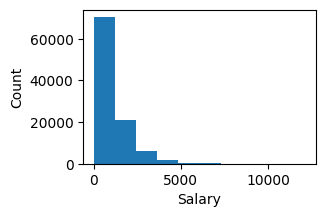

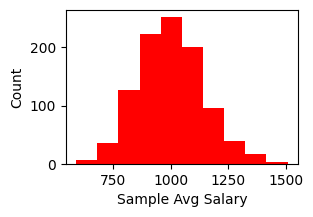

In [2]:
# Create a right-skewed dataset (log-normal distribution)
population = np.random.exponential(scale=1000, size=100_000)

# Let's apply CLT : Take multiple samples and store their means
sample_means = []
for _ in range(1000):
    sample = np.random.choice(population, size=50)  # sample size = 50
    sample_means.append(np.mean(sample))

# Plot the original population distribution

plt.figure(figsize=(3,2))
plt.hist(population)
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

# Plot the means distribution
plt.figure(figsize=(3,2))
plt.hist(sample_means, color="r")
plt.xlabel("Sample Avg Salary")
plt.ylabel("Count")
plt.show()

## 7. More Practice


Consider the following functions:
$$ f(x) = 1 $$
$$ f(x) = 2x $$
$$ f(x) = 3x^2 $$
$$ f(x) = 4\lvert x - 0,5\rvert $$
$$ f(x) = 2 - 4\lvert x - 0,5\rvert $$

For each of these functions `f`:
1. Generate a big array of, say, 2000 values `x` between 0 and 1
2. Generate the array $f(x)$ and plot $f(x)$. This is just to see how the original function looks
3. Create 1000 experiments like this:
    1. Generate 25 random values $x$ between 0 and 1: `np.random.rand(25)`
    3. Generate $y = f(x)$
    2. Sum all 25 values $y$
    3. Add the sum to the array of sums
4. Plot the distribution of 1000 sums

If you want, you can experiment with the "settings" even more - try changing the number of experiments, number of sums, range of $x$, functions, etc.

In [3]:
def plot_simple_function(x: np.ndarray, f: Callable, title: str):
    plt.figure(figsize=(3,2))
    plt.scatter(x, f(x), s=1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.show()

# Generate a big array of 2000 values between 0 and 1.
x = np.random.rand(2000)

In [4]:
def plot_simple_function(x: np.ndarray, f: Callable, title: str):
    plt.figure(figsize=(3,2))
    plt.scatter(x, f(x), s=1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.show()

# Generate a big array of 2000 values between 0 and 1.
x = np.random.rand(2000)

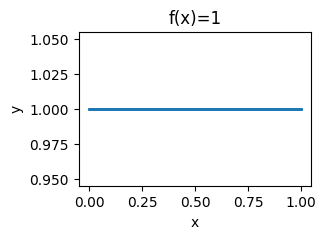

In [5]:
f_1 = lambda x : 0*x + 1
plot_simple_function(x, f_1, "f(x)=1")

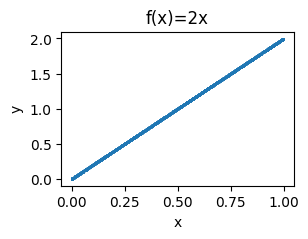

In [6]:
f_2 = lambda x : 2 * x
plot_simple_function(x, f_2, "f(x)=2x")

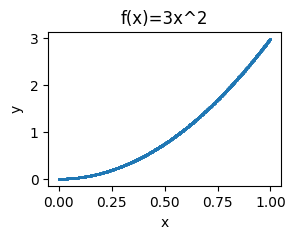

In [7]:
f_3 = lambda x : 3 * (x ** 2)
plot_simple_function(x, f_3, "f(x)=3x^2")

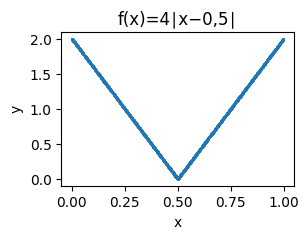

In [8]:
f_4 = lambda x : 4 * np.abs(x - 0.5)
plot_simple_function(x, f_4, "f(x)=4∣x−0,5∣")

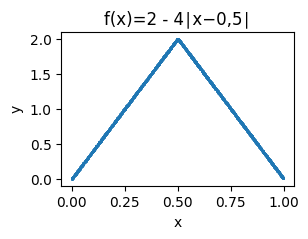

In [9]:
f_5 = lambda x : 2 - 4 * np.abs(x - 0.5)
plot_simple_function(x, f_5, "f(x)=2 - 4∣x−0,5∣")

In [10]:
def plot_clt(f: Callable, title: str):
    # Create 1000 random samples and sum each sample values.
    y_sums = []
    for _ in range(1000):
        x = np.random.rand(25)
        y = f(x)
        y_sum = np.sum(y)
        y_sums.append(y_sum)

    # Plot the sums distribution
    plt.figure(figsize=(3,2))
    plt.hist(y_sums)
    plt.xlabel("Sample Sum")
    plt.ylabel("Count")
    plt.title(title)
    plt.show()

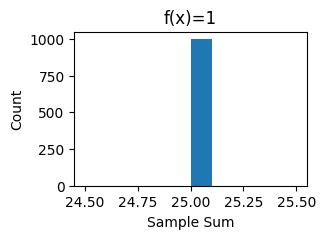

In [11]:
plot_clt(f_1, "f(x)=1")

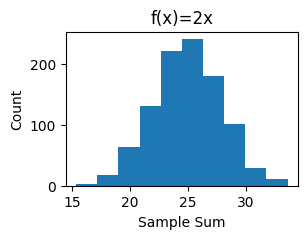

In [12]:
plot_clt(f_2, "f(x)=2x")

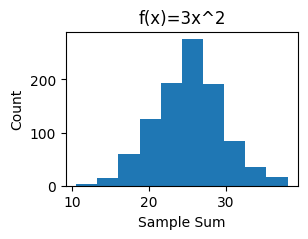

In [13]:
plot_clt(f_3, "f(x)=3x^2")

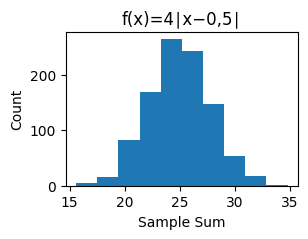

In [14]:
plot_clt(f_4, "f(x)=4∣x−0,5∣")

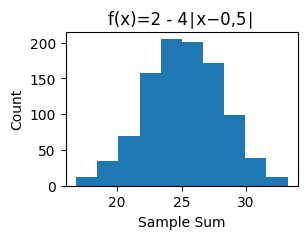

In [15]:
plot_clt(f_5, "f(x)=2 - 4∣x−0,5∣")

## References
* [Central Limit Theorem Simplified!](https://medium.com/@seema.singh/central-limit-theorem-simplified-46ddefeb13f3)
* [Understanding the Central Limit Theorem in Machine Learning](https://medium.com/@dishant.salunke9/understanding-the-central-limit-theorem-in-machine-learning-36a66991247e)